In [2]:
import mglearn

In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Linear Regresion

## Ordinary Least Squares (OLS)

Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters `w` and `b` that minimize the mean squared error between predictions and the true regression targets, y, on the training set. The `mean squared error` is the sum of the squared differences between the predictions and the true values. Linear regression (OLS) has no parameters, which is a benefit, but it also has no way to control model complexity.

### Linear regression using OLS on `make_wave` dataset

In [3]:
x, y = mglearn.datasets.make_wave(n_samples=60)

In [7]:
x.shape

(60, 1)

In [9]:
y

array([-1.18073311,  0.50015912,  0.13772889,  1.17396178, -1.32035898,
       -2.37364735, -0.70117304,  1.20319981,  0.29262945,  0.44971554,
       -0.48647165,  1.39515571,  1.0738403 , -1.30838148, -1.27708305,
       -0.94575843, -0.32691082,  0.26134393, -1.25635546, -0.74646948,
        0.96250584, -0.75240909, -0.17851354,  0.13368988, -0.38575444,
        0.79900059, -1.11948406,  0.97923163,  0.65823236, -0.08137001,
       -0.72142625, -1.0767626 , -0.83684971,  0.70945882,  0.95081838,
        0.38109799, -0.19612826, -0.9139074 ,  0.81263817, -0.93416482,
       -1.7113156 , -0.32309571, -0.44713127,  1.19812891, -0.75150632,
        0.40012342, -0.02565504,  0.77613985,  0.23938228, -1.58831973,
        0.73141352,  0.25092544,  1.01581268,  1.28948157,  0.65213403,
        0.82614241, -1.7240941 , -1.54664568, -1.03731593, -0.49131681])

In [10]:
y.shape

(60,)

In [4]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x_train, y_train)

In [14]:
print('lr.coef_ :{}'.format(lr.coef_))
print('lr.intercept_ :{}'.format(lr.intercept_))

lr.coef_ :[0.39390555]
lr.intercept_ :-0.031804343026759746


In [15]:
type(lr.coef_)

numpy.ndarray

In [17]:
type(lr.intercept_)

numpy.float64

In [18]:
# performance on training set and test set

print('Training set score: {:.2f}'.format(lr.score(x_train,y_train)))
print('Test set score: {:.2f}'.format(lr.score(x_test,y_test)))

Training set score: 0.67
Test set score: 0.66


R2 value is not very good but score on training and tets set is very close. Model is likely <b>underfitting</b>. 

### Linear regression using OLS on `extended_boston` dataset

In [20]:
x, y = mglearn.datasets.load_extended_boston()

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [23]:
x_train.shape

(379, 104)

In [24]:
type(x_train)

numpy.ndarray

In [25]:
x_test.shape

(127, 104)

In [26]:
y_train.shape

(379,)

In [27]:
y_test.shape

(127,)

In [29]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression().fit(x_train, y_train)

In [31]:
print('Coefficients: {}'.format(lr1.coef_))
print('Intercept: {}'.format(lr1.intercept_))

Coefficients: [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.73871915e+01 -1.75331865e+01  4.10103194e+00
  2.9366647

In [32]:
# performance on training set and test set

print('Training set score: {:.2f}'.format(lr1.score(x_train, y_train)))
print('Test set score: {:.2f}'.format(lr1.score(x_test, y_test)))

Training set score: 0.95
Test set score: 0.61


This discrepancy between performance on the training set and the test set is a clear sign of <b>overfitting</b>, and therefore we should try to find a model that allows us to control complexity. One of the most commonly used alternatives to standard linear regression is <b>ridge regression</b>.

## Ridge Regression

Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares. In ridge regression,
though, the coefficients (`w`) are chosen not only so that they predict well on the training data, but also to fit an additional constraint.
We also want the magnitude of coefficients to be as small as possible; in other words, all entries of `w` should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as
possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called regularization. <b>Regularization means explicitly restricting a model to avoid overfitting</b>. The particular kind used by ridge regression is known as <b>L2 regularization</b>.

### Ridge regression on `extended_boston` dataset

In [36]:
x, y = mglearn.datasets.load_extended_boston()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [37]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(x_train, y_train)

In [38]:
print('Coefficients:{}'.format(ridge.coef_))
print('Intercept:{}'.format(ridge.intercept_))

Coefficients:[-1.41368408e+00 -1.55661895e+00 -1.46543409e+00 -1.26616071e-01
 -7.91193605e-02  8.33161023e+00  2.54975060e-01 -4.94145701e+00
  3.89862268e+00 -1.05866058e+00 -1.58433734e+00  1.05103856e+00
 -4.01220799e+00  3.33720475e-01  3.64725471e-03 -8.49295793e-01
  7.44989267e-01 -1.43106836e+00 -1.62981017e+00 -1.40486294e+00
 -4.47314366e-02 -1.74619880e+00 -1.46715888e+00 -1.33237111e+00
 -1.69154625e+00 -5.06179637e-01  2.62197591e+00 -2.09210002e+00
  1.95074661e-01 -2.75469422e-01  5.11308202e+00 -1.67083739e+00
 -9.81863179e-02  6.34477127e-01 -6.10008281e-01  4.01805897e-02
 -1.27661999e+00 -2.91349679e+00  3.39544035e+00  7.91904036e-01
  1.35260232e+00 -4.03661265e+00  2.32361734e+00 -3.36712926e+00
  1.81279204e+00  3.01566897e+00 -1.89452070e+00 -2.50844073e-01
 -2.89543735e+00 -1.26616071e-01 -5.00217192e+00 -2.43951806e+00
  2.85071846e+00 -8.57081177e-01  2.99141960e+00  2.34589755e+00
  1.31207081e+00  1.71845119e+00 -2.59766697e+00 -1.32370675e+00
 -2.81242223

In [39]:
# Model performance on training and test set
print('Training set score: {:.2f}'.format(ridge.score(x_train,y_train)))
print('Test set score: {:.2f}'.format(ridge.score(x_test,y_test)))

Training set score: 0.89
Test set score: 0.75


With linear regression (OLS), we were overfitting our data. Ridge is a more restricted model, so we are
less likely to overfit. A less complex model means worse performance on the training
set, but better generalization.

The Ridge model makes a trade-off between the simplicity of the model (near-zero
coefficients) and its performance on the training set using `alpha` parameter. Increasing alpha forces coefficients to move more toward zero, which decreases
training set performance but might help generalization. Decreasing alpha allows the coefficients to be less restricted.

Plots that show model performance as a function of dataset
size are called <b><i>learning curves</i></b>

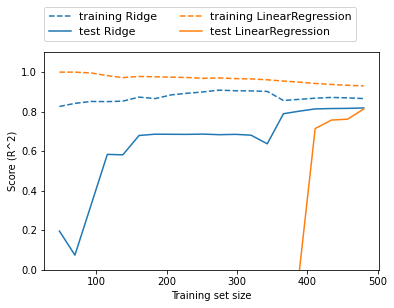

In [40]:
mglearn.plots.plot_ridge_n_samples()

With enough training data, regularization becomes less important, and given enough data, ridge and
linear regression will have the same performance.

Another interesting aspect to observe is the decrease in training performance for linear regression. If more data
is added, it becomes harder for a model to overfit, or memorize the data.

## Lasso Regression

An alternative to Ridge for regularizing linear regression is Lasso. As with ridge
regression, using the lasso also restricts coefficients to be close to zero, but in a
slightly different way, called <b>L1 regularization</b>.
The consequence of L1 regularization
is that when using the lasso, some coefficients are <b>exactly zero</b>. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to
interpret, and can reveal the most important features of your model.

### Lasso regression on `extended_boston` dataset

In [41]:
from sklearn.model_selection import train_test_split

x,y = mglearn.datasets.load_extended_boston()
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [43]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(x_train, y_train)

In [44]:
print('Coefficient: {}'.format(lasso.coef_))
print('Intercept: {}'.format(lasso.intercept_))

Coefficient: [-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -5.3529079  -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.         -1.05063037 -3.3104274  -0.         -0.          0.
 -0.         -0.         -0.          0.         -0.         -0.41386744
 -0.

In [49]:
# Performance on training and test set
print('Training set score: {:.2f}'.format(lasso.score(x_train,y_train)))
print('Test set score: {:.2f}'.format(lasso.score(x_test,y_test)))
print('Number of features used: {}'.format(np.sum(lasso.coef_!=0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


Lasso does quite badly, both on the training and the test set. This
indicates that we are underfitting, and we find that it used only 4 of the 105 features.  To reduce underfitting, let’s try decreasing `alpha`. When we
do this, we also need to increase the default setting of `max_iter`

In [52]:
# trying with alpha=0.1

from sklearn.linear_model import Lasso
lasso_1 = Lasso(alpha=0.1).fit(x_train, y_train)
# Performance on training and test set
print('Training set score: {:.2f}'.format(lasso_1.score(x_train,y_train)))
print('Test set score: {:.2f}'.format(lasso_1.score(x_test,y_test)))
print('Number of features used: {}'.format(np.sum(lasso_1.coef_!=0)))

Training set score: 0.77
Test set score: 0.63
Number of features used: 8


In [55]:
# trying with alpha=0.01

from sklearn.linear_model import Lasso
lasso_2 = Lasso(alpha=0.01,max_iter=100000).fit(x_train, y_train)
# Performance on training and test set
print('Training set score: {:.2f}'.format(lasso_2.score(x_train,y_train)))
print('Test set score: {:.2f}'.format(lasso_2.score(x_test,y_test)))
print('Number of features used: {}'.format(np.sum(lasso_2.coef_!=0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


A lower alpha allowed us to fit a more complex model, which worked better on the
training and test data

In [57]:
# trying with alpha=0.0001

from sklearn.linear_model import Lasso
lasso_3 = Lasso(alpha=0.0001,max_iter=100000).fit(x_train, y_train)
# Performance on training and test set
print('Training set score: {:.2f}'.format(lasso_3.score(x_train,y_train)))
print('Test set score: {:.2f}'.format(lasso_3.score(x_test,y_test)))
print('Number of features used: {}'.format(np.sum(lasso_3.coef_!=0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


`alpha=0.0001` leads to overfitting.
If we set alpha too low, however, we again remove the effect of regularization and end
up overfitting

What happens if alpha is too high?

In [59]:
# trying with alpha=20

from sklearn.linear_model import Lasso
lasso_4 = Lasso(alpha=0.0001,max_iter=100000).fit(x_train, y_train)
# Performance on training and test set
print('Training set score: {:.2f}'.format(lasso_4.score(x_train,y_train)))
print('Test set score: {:.2f}'.format(lasso_4.score(x_test,y_test)))
print('Number of features used: {}'.format(np.sum(lasso_4.coef_!=0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Very poor performance!

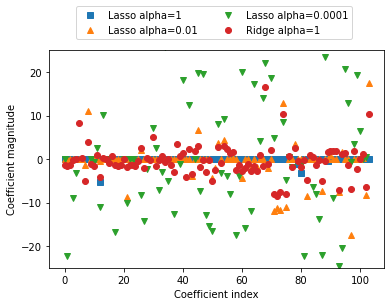

In [69]:
# Plotting the coefficients of different models

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso_2.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso_3.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge.coef_, 'o', label="Ridge alpha=1")
plt.legend(ncol=2, loc=(0.08, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()

The Ridge model with `alpha=0.1` has similar
predictive performance as the lasso model with `alpha=0.01`, but using Ridge, all coefficients are nonzero.

scikit-learn also provides
the <b>ElasticNet</b> class, which combines the penalties of Lasso and Ridge. In practice,
this combination works best, though at the price of having two parameters to adjust:
one for the L1 regularization, and one for the L2 regularization.
